# pseudo classification

In [1]:
import pandas as pd
import pydotplus
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.externals.six import StringIO
from IPython.display import Image

/usr/local/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [2]:
fms = pd.read_excel("results_pseudo_binary.xlsx")
antibiotic = fms["antibiotic"].str.get_dummies()
models = fms["model"].str.get_dummies()
penalty = fms["penalty"].str.get_dummies()
fms = pd.concat([fms, models, penalty, antibiotic], axis=1).drop(columns = ['model', 'antibiotic', 'penalty'])
fms.head()

,response,encode,accuracy,f1,recall,precision,logistic,rf,svm,elasticnet,l1,l2,carb,toby
0,binary,0,0.833,0.615,0.667,0.571,1,0,0,0,1,0,1,0
1,binary,0,0.767,0.222,0.500,0.143,1,0,0,0,1,0,0,1
2,binary,0,0.833,0.444,0.333,0.666,1,0,0,0,0,1,1,0
3,binary,0,0.900,0.000,0.000,0.000,1,0,0,0,0,1,0,1
4,binary,0,0.800,0.571,0.667,0.500,1,0,0,1,0,0,1,0


In [3]:
tree1 = DecisionTreeRegressor(max_depth=10)
X = fms.drop(['accuracy', 'f1', 'recall', 'precision', 'response'], axis=1)
y = fms.accuracy + fms.f1
X = X.fillna(-1)
X.isnull().sum()

encode        0
logistic      0
rf            0
svm           0
elasticnet    0
l1            0
l2            0
carb          0
toby          0
dtype: int64

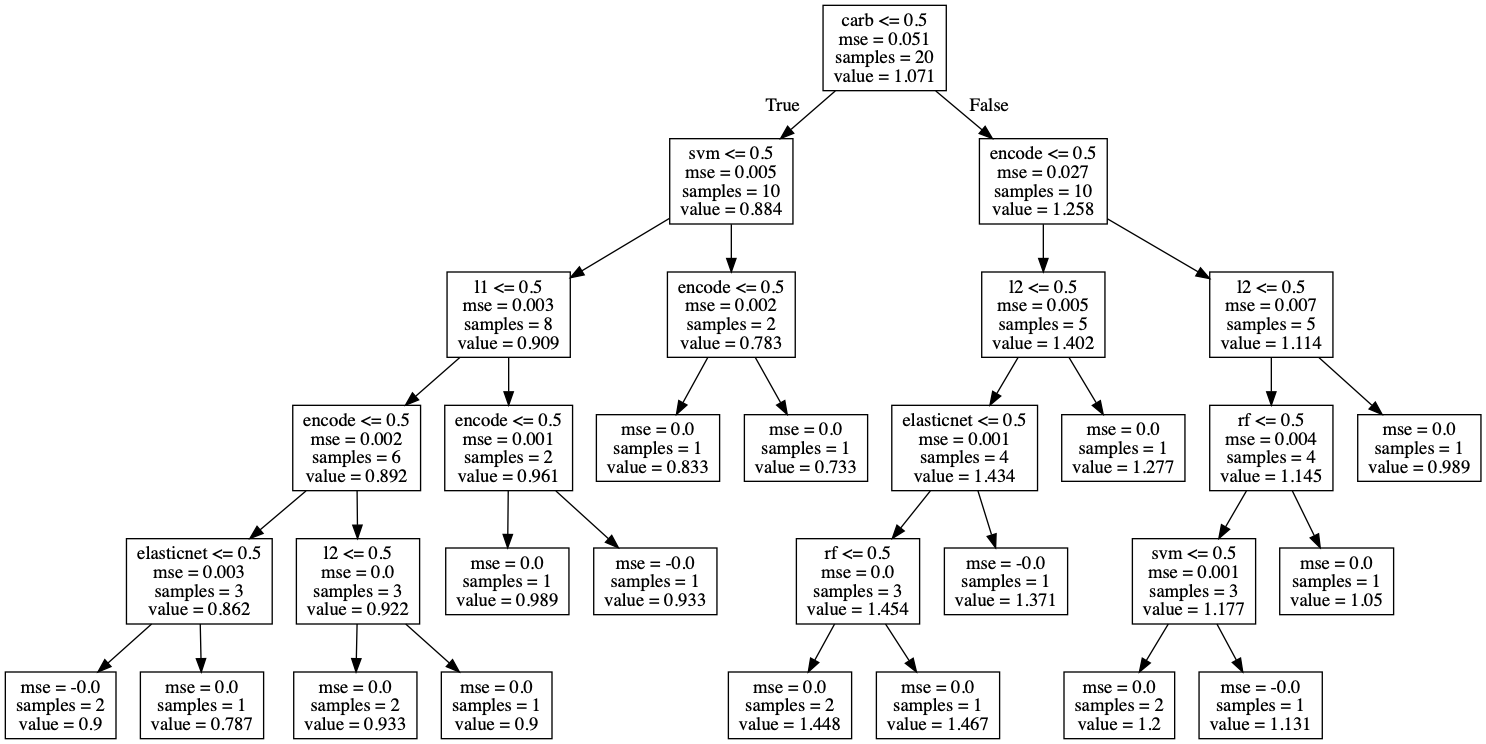

In [4]:
tree1.fit(X, y)
dot_data = StringIO()
export_graphviz(tree1, out_file=dot_data, feature_names=X.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# pseudo regression

In [5]:
fms = pd.read_excel("results_pseudo_num.xlsx")
antibiotic = fms["antibiotic"].str.get_dummies()
models = fms["model"].str.get_dummies()
fms = pd.concat([fms, models, antibiotic], axis=1).drop(columns = ['model', 'antibiotic'])
fms.head()

,response,encode,r2,mae,mse,rmse,linear,rf,svm,carb,toby
0,numerical,0,-0.733,9.960,160.138,12.655,1,0,0,1,0
1,numerical,0,-0.104,8.192,107.800,10.383,1,0,0,0,1
2,numerical,0,-0.729,9.948,159.767,12.639,0,0,1,1,0
3,numerical,0,-1.137,11.596,208.528,14.440,0,0,1,0,1
4,numerical,0,-0.240,8.001,114.618,10.706,0,1,0,1,0


In [6]:
tree2 = DecisionTreeRegressor(max_depth=10)
X = fms.drop(['r2', 'mae', 'mse', 'rmse', 'response'], axis=1)
y = fms.rmse
X = X.fillna(-1)
X.isnull().sum()

encode    0
linear    0
rf        0
svm       0
carb      0
toby      0
dtype: int64

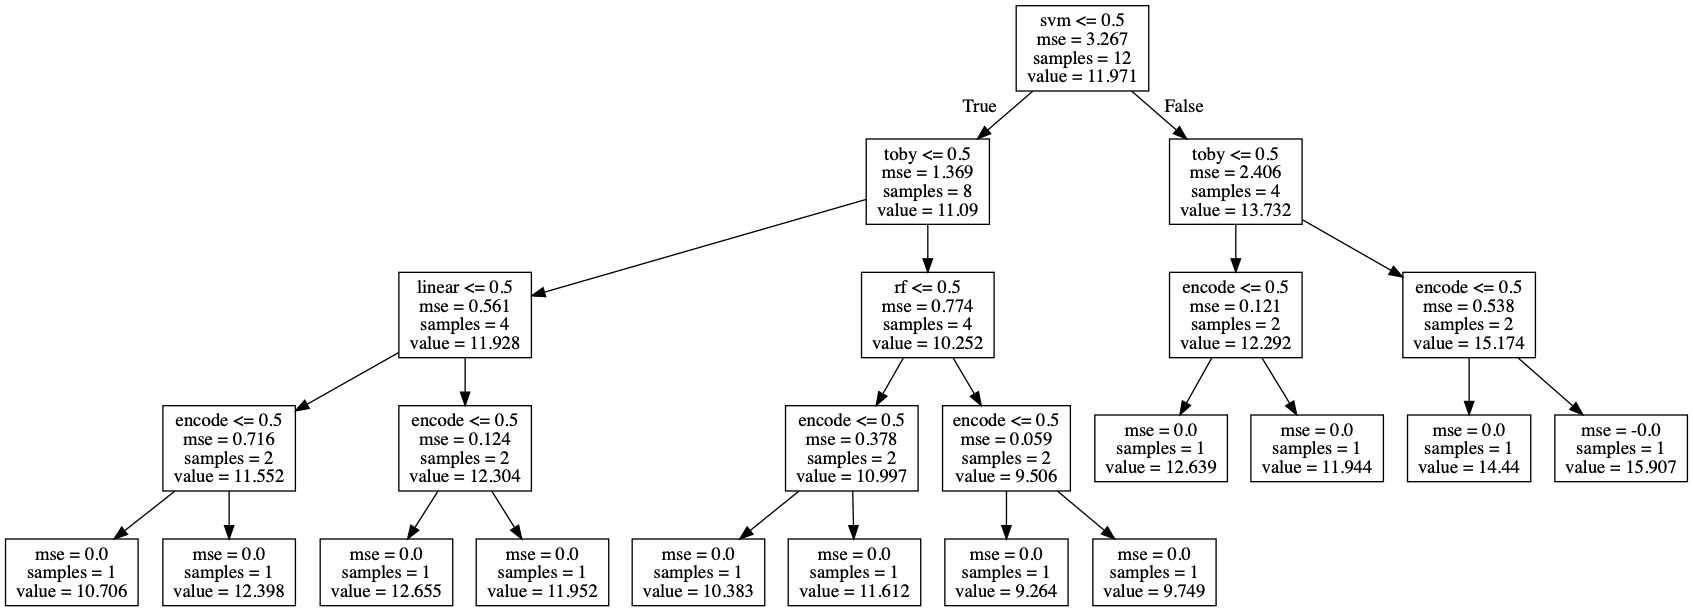

In [7]:
tree2.fit(X, y)
dot_data = StringIO()
export_graphviz(tree2, out_file=dot_data, feature_names=X.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# staph classification

In [8]:
fms = pd.read_excel("results_staph_binary.xlsx")
models = fms["model"].str.get_dummies()
penalty = fms["penalty"].str.get_dummies()
fms = pd.concat([fms, models, penalty], axis=1).drop(columns=['model', 'penalty'])
fms.head()

,response,encode,accuracy,f1,recall,precision,logistic,rf,svm,elasticnet,l1,l2
0,binary,0,0.710,0.400,0.6,0.300,1,0,0,0,1,0
1,binary,0,0.742,0.333,0.4,0.286,1,0,0,0,0,1
2,binary,0,0.742,0.333,0.4,0.286,1,0,0,1,0,0
3,binary,0,0.839,0.000,0.0,0.000,0,0,1,0,0,0
4,binary,0,0.871,0.500,0.4,0.667,0,1,0,0,0,0


In [9]:
tree3 = DecisionTreeRegressor(max_depth=6)
X = fms.drop(['accuracy', 'f1', 'recall', 'precision', 'response'], axis=1)
y = fms.accuracy + fms.f1
X = X.fillna(-1)
X.isnull().sum()

encode        0
logistic      0
rf            0
svm           0
elasticnet    0
l1            0
l2            0
dtype: int64

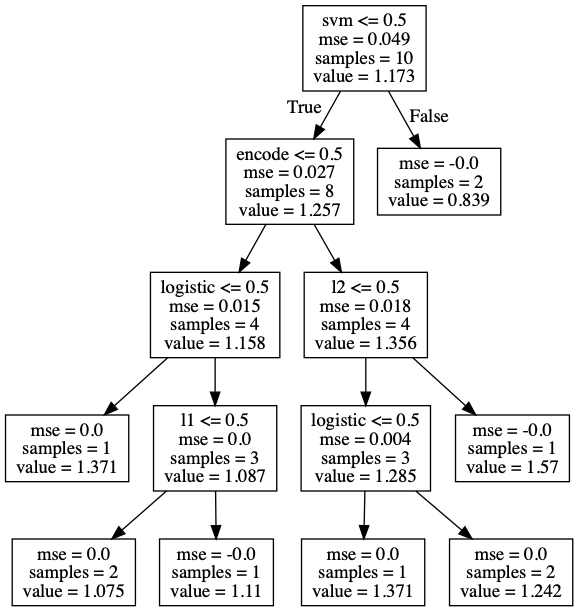

In [10]:
tree3.fit(X, y)
dot_data = StringIO()
export_graphviz(tree3, out_file=dot_data, feature_names=X.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())

# staph regression

In [11]:
fms = pd.read_excel("results_staph_num.xlsx")
models = fms["model"].str.get_dummies()
fms = pd.concat([fms, models], axis=1).drop(columns = ['model'])
fms.head()

,response,encode,r2,mae,mse,rmse,linear,rf,svm
0,numerical,0,-0.781,9438.549,1.674178e+08,12939.0030,1,0,0
1,numerical,0,-0.008,7018.458,9.470110e+07,9731.4490,0,0,1
2,numerical,0,-0.222,7976.631,1.148415e+08,10716.4110,0,1,0
3,numerical,1,-0.005,8567.093,1.189002e+08,10904.1361,1,0,0
4,numerical,1,0.021,8249.867,1.157903e+08,10760.5900,0,0,1


In [12]:
tree4 = DecisionTreeRegressor(max_depth=4)
X = fms.drop(['r2', 'mae', 'mse', 'rmse', 'response'], axis=1)
y = fms.rmse
X = X.fillna(-1)
X.isnull().sum()

encode    0
linear    0
rf        0
svm       0
dtype: int64

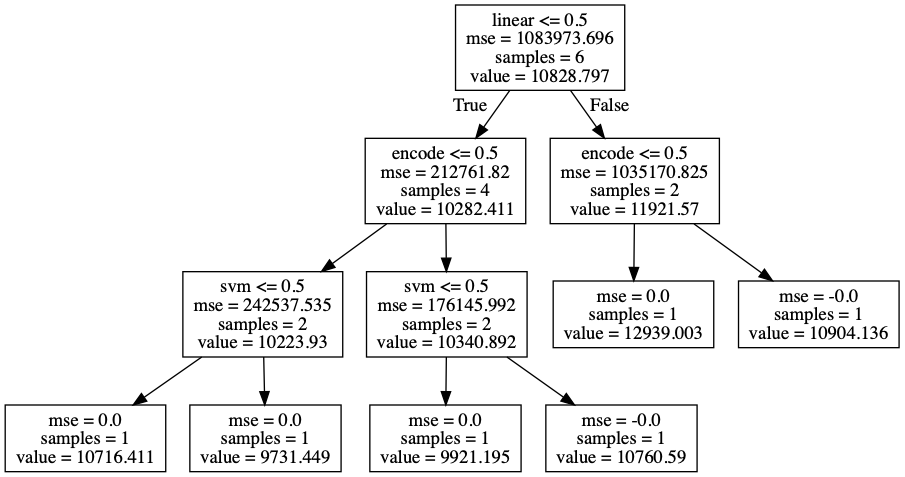

In [13]:
tree4.fit(X, y)
dot_data = StringIO()
export_graphviz(tree4, out_file=dot_data, feature_names=X.columns, leaves_parallel=False, node_ids=False)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
Image(graph.create_png())